In [1]:
#Import package
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
import funcoes as fun
import estimation

import warnings
warnings.filterwarnings('ignore')

# Análise Exploratória dos dados

**Informação não confirmada**: São baseados em dados que são inéditos e normalmente pessoais.

Os dados de **informações não confirmadas** normalmente falha pelo seguintes problemas:

- Pequeno número de observação;

- Viés de seleção;

- Viés de confirmação;

- Inexatidão;

Alguns exemplo de dados não confirmados:

- Ocorrência de uma determinada cheia (moradores relatam que ocorre a cada 2 anos);

- Sobre um período do ano (se a cinza da fogueira do são joão amanhecer molhada, é sinal de um bom inverno no próximo ano);

## Uma abordagem estatística

São usadas algumas ferramentas estatísticas para diminuir as anetodas, essas ferramentas são:

- Coleta de dados;

- Estatísticas descritivas; 

- Análise exploratória de dados;

- Estimativa;

- Teste de hipóteses.

## Coleta de dados

### Variáveis

Nas diferentes aplicações foram utilizadas as seguintes variáveis:

- Pluviométrica;
    
- Fluviométrica;

- Evaporação;

### Fontes de dados

- **Séries de vazões naturais** (reconstituídas pela ONS);

- **Séries de vazões observadas** (ANA):
    
    - Nome da Estação: UHE MANSO JUSANTE 
    
    - Código: 66210000
    
    - Nome da Estação: FAZENDA RAIZAMA (COIMBRA)
    
    - Código: 66231000
    
- **Séries de chuvas observadas** (ANA):

    - Nome da Estação: FAZENDA RAIZAMA (COIMBRA)
    
    - Código: 01455008
    
- **Séries de Evapotranspiração** (INMET):

    - Estação: CUIABÁ
    
    - Código: 83361
    
    - Estação: DIAMANTINO
    
    - Código: 83309
    
    - Estação: PADRE RICARDO REMETTER
    
    - Código: 83364

### Importando os dados

Os dados foram tratados e exportados para um arquivo .csv

In [2]:
dir_dados = "dados_com_evap_manso.csv"
# "MANSO": Dados Naturais
# "COIMBRA_F": Dados Observados
# "COIMBRA_P": Dados de chuva
dados_nat = fun.dados(dir_dados, label="MANSO")

![](gantt_manso_com_evap.png)

# Distribuições

Histograma para dados de vazão diária;

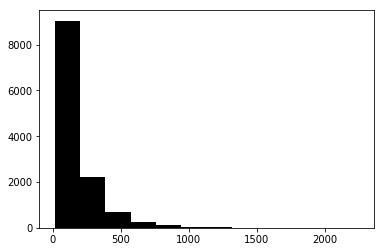

In [3]:
_ = plt.hist(dados_nat, bins=12, label='Manso_Nat', color='black')

## Resumindo Distribuições

Resumir a distribuição com algumas estatísticas descritivas;

Algumas das características que podemos querer relatar são:

- **Tendência central**: Os valores tendem a se agrupar em torno de um determinado ponto?

- **Modas**: Existe mais de um cluster?

- **Propagação**: Quanta variabilidade existe nos valores?

- **Caudas**: Com que rapidez as probabilidades diminuem à medida que nos afastamos das modas?

- **Outliers**: Existem valores extremos longe dos modas?

### Média

A média é o resumo estatístico mais comum, que se destina a descrever a tendência central da distribuição.

\begin{equation}
    \bar{x} = \frac{1}{n} \sum_i X_i
\end{equation}

A "**mean**" de uma amostra é o resumo estatístico calculado com a fórmula anterior.

Uma "**average**" é uma dos várias resumos estatísticos que você pode escolher para descrever uma tendência central.

### Variância

A variância é um resumo estatístico destinada a descrever a variabilidade ou o spread de uma distribuição;

\begin{equation}
    S^2 = \frac{1}{n} \sum_i (x_i - \bar{x})^2
\end{equation}

A raiz quadrada da variância, S, é o desvio padrão.

**BoxPlot** dados de vazão diária

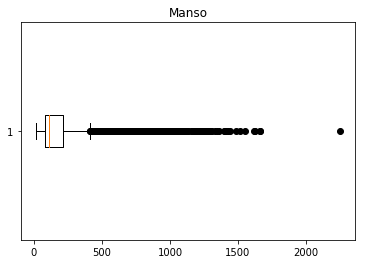

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_title('Manso')
_ = ax1.boxplot(dados_nat, sym='black', vert=False)

# Função de Massa de Probabilidade

A **Função de Massa de Probabilidade (PMF)** é uma maneira de representar uma distribuição e mapeia as probabilidade relativa de cada valor;

- Probabilidade é a divisão da frequência pelo tamanho da amostra;

Como a pmf é normalizada, a probilidade total é 1;

In [5]:
#Mês ínicio do ano hidrológico
inicio = fun.month_start_year_hydrologic(dados_nat)

#Dados de máximas anuais
dados_nat_max = fun.annual(dados_nat, inicio)

**Hidrograma de máximas anuais**

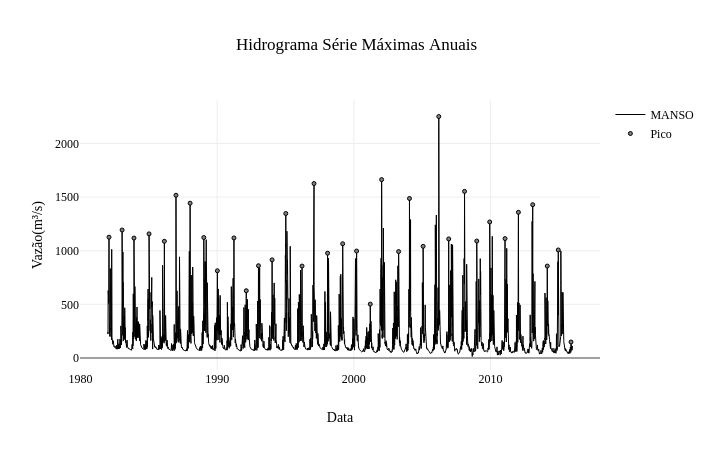

In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from hydrogram_annual import HydrogramAnnual
fig, data = HydrogramAnnual(dados_nat, dados_nat_max).plot()
iplot(fig)

**BoxPlot** dados de máximas anauis

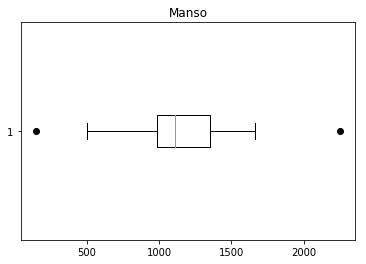

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Manso')
_ = ax1.boxplot(dados_nat_max, sym='black', vert=False)

In [8]:
#PMF
pmf_nat = thinkstats2.Pmf(dados_nat_max)
print('Probabilidade Total: ', pmf_nat.Total())

Probabilidade Total:  1.0000000000000002


Pmf e Hist são objetos similires em muitos aspectos;

A diferneça é:

- **Hist** contabiliza valores inteiros;

- **PMF** contabiliza probabilidades de ponto flutuantes;

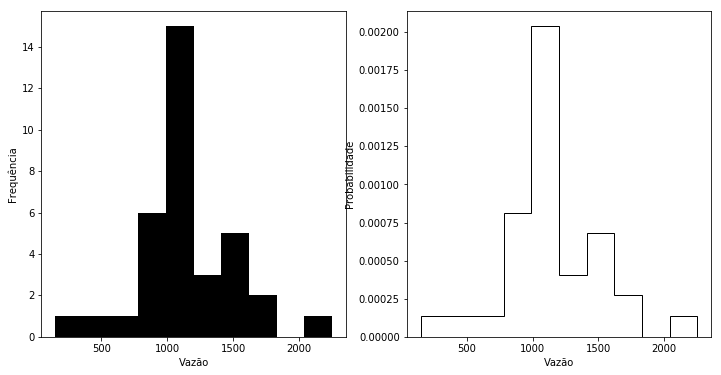

In [9]:
thinkplot.PrePlot(1, cols=2)
counts, bins = np.histogram(dados_nat_max)
hist = plt.hist(bins[:-1], bins, weights=counts, color='black')
thinkplot.Config(xlabel='Vazão', ylabel='Frequência')

thinkplot.SubPlot(2)
counts, bins = np.histogram(dados_nat_max, density=True)
_ = plt.hist(bins[:-1], bins, weights=counts, color='black', histtype='step')
thinkplot.Config(xlabel='Vazão', ylabel='Probabilidade')

## As limitações das PMFs

- As Pmfs funcionam bem para tamanhos pequenos;

- Com o aumento do tamanho, a probabilidade diminui e aumenta os ruídos;

- Quando se tem uma amostra grande, é difícil de se fazer comparações usando uma Pmf;

- Podemos usar categorias para minizar esse problema, mas difícil de obter o tamanho de cada categoria;

- Uma outra solução é utilizar Função de Distribuição Acumulada (no inglês CDF).

# Função de Distribuição Acumulada

## Percentis

- O percentil é o valor de uma evento ser menor ou igual;

- Percentil Rank: Calcula a classificação percentual do valor(recebido) em um conjunto de valores;

- Percentil: Calcula o valor correspondente ao percentil(recebido);

## CDFs

- A CDF mapeia os valores para um rank percentil;

- Para avaliar valor particular de uma vazão x, calculamos a fração de valores na distribuição menor ou igual a vazão x;

- Na CDF podemos avaliar qualquer valor, não apenas valores que aparecem na amostra;

A CDF dos valores de vazão máximas anuais é representada a seguir

In [10]:
# "COIMBRA_F": Dados Observados
dados_obs = fun.dados(dir_dados, label="COIMBRA_F")

#Considerando o período sem falha dos dados observados entre "01/01/1982" e "31/12/1986";
# e atualizando os dados naturais e observados para o período sem falhas
dados_obs = fun.date(dados_obs, start="01/01/1982", end="31/12/1986")
dados_nat = fun.date(dados_nat, start="01/01/1982", end="31/12/1986")

#Dados de máximas anuais
dados_obs_max = fun.annual(dados_obs, inicio)
dados_nat_max = fun.annual(dados_nat, inicio)

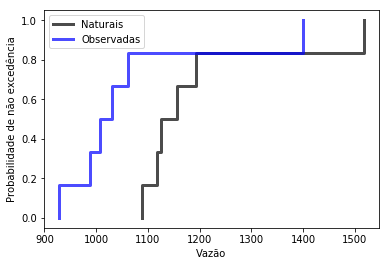

<Figure size 576x432 with 0 Axes>

In [11]:
cdf_nat_max = thinkstats2.Cdf(dados_nat_max, label='Naturais')
cdf_obs_max = thinkstats2.Cdf(dados_obs_max, label='Observadas')
thinkplot.Cdf(cdf_nat_max, color='black')
thinkplot.Cdf(cdf_obs_max, color='blue')
thinkplot.Show(xlabel='Vazão', ylabel='Probabilidade de não excedência')

A CDF apresenta algumas vantagens:

- A CDF também fornece uma representação visual da forma da distribuição;

- Os valores mais comuns aparecem na parte mais íngreme da CDF;

- As informações de uma CDF são apresentadas com mais clareza do que uma PMF;

- As CDFs são especialmente úteis para comparações, as diferenças entre distribuições são mais claras na Cdf;

Os percentil são usados para computar algumas estatísticas:

- Percentil 50°, corresponde ao valor central da distribuição, conhecido como **mediana**;

- Outra estatítica é o **intervalo interquantil**, que é a diferença entre o percentil 75° e 25°;

Usados para resumir a forma de uma distribuição.

**Quartis** das máximas anuais naturais 

In [12]:
q_nat_1 = cdf_nat_max.Percentile(25)
q_nat_2 = cdf_nat_max.Percentile(50)
q_nat_3 = cdf_nat_max.Percentile(75)

print('Valor referente ao percentil 25: ', q_nat_1)
print('Valor referente ao percentil 50: ', q_nat_2)
print('Valor referente ao percentil 75: ', q_nat_3)

Valor referente ao percentil 25:  1118.0
Valor referente ao percentil 50:  1126.0
Valor referente ao percentil 75:  1193.0


# Modelando Distribuições

## Distribuição Exponencial

Logo abaixo podemos observar os aspectos da CDF exponencial para vários valores de $\lambda$.

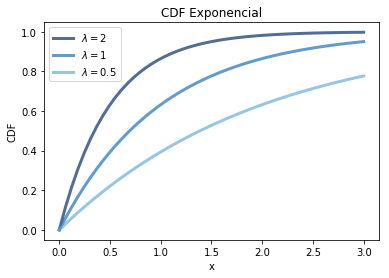

In [13]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='CDF Exponencial', xlabel='x', ylabel='CDF')

A distribuição exponencial para os dados de precipitação:

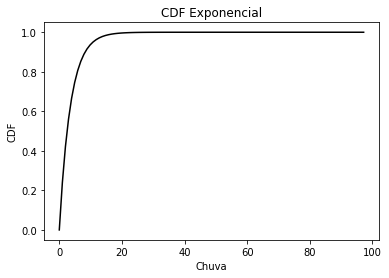

In [14]:
# "COIMBRA_P": Dados de chuva
dados_chuva = fun.dados(dir_dados, label="COIMBRA_P")

#Usando os valores de chuva para o período sem falhas
dados_chuva_ = fun.date(dados_chuva, start="01/01/1982", end="31/12/1986")

fun.expon_distribution(dados_chuva_)
thinkplot.Config(title='CDF Exponencial', xlabel='Chuva', ylabel='CDF', legend=True)

## Distribuição Normal

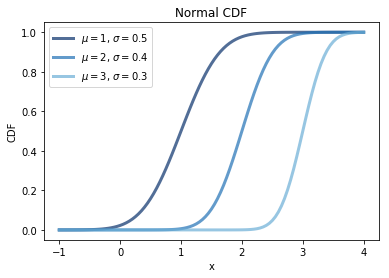

In [15]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

Distribuição normal para vários valores de parâmetros;

In [16]:
dados_chuva_anual = fun.dados_acumulado(dados_chuva, freq='A')

O gráfico pdf da distribuição normal pode ser gerada com base nos dados de de chuva acumulada anual;

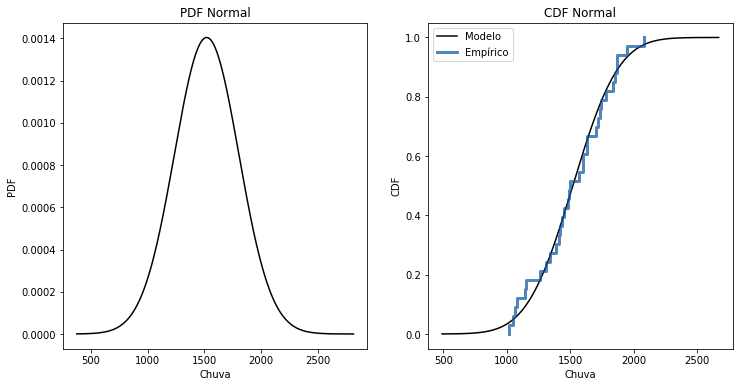

In [17]:
thinkplot.PrePlot(1, cols=2)
fun.normal_pdf(dados_chuva_anual)
thinkplot.Config(title='PDF Normal', xlabel='Chuva', ylabel='PDF', legend=True)

thinkplot.SubPlot(2)
fun.normal_cdf(dados_chuva_anual, label='Modelo')
cdf = thinkstats2.Cdf(dados_chuva_anual, label='Empírico')
thinkplot.Cdf(cdf)

thinkplot.Config(title='CDF Normal', xlabel='Chuva', ylabel='CDF', legend=True)

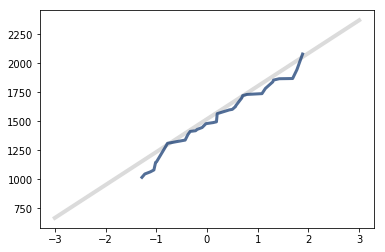

In [18]:
mean = dados_chuva_anual.mean()
std = dados_chuva_anual.std()
xs = [-3, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(dados_chuva_anual)

thinkplot.Plot(xs, ys)

O gráfico (papel de probabilidade normal) acima mostra que os dados de vazão acumulada se adequa à distribuição normal, pois o gráfico não é aproximadamente uma reta;

## Distribuição LogNormal

3.693039739609817


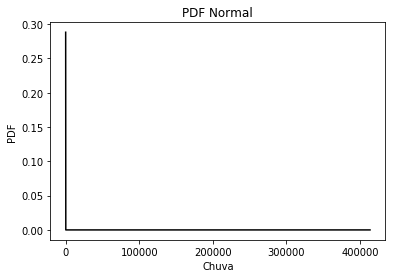

In [19]:
fun.lognormal_pdf(dados_obs)
thinkplot.Config(title='PDF Normal', xlabel='Chuva', ylabel='PDF', legend=True)

## Distribuição de Pareto

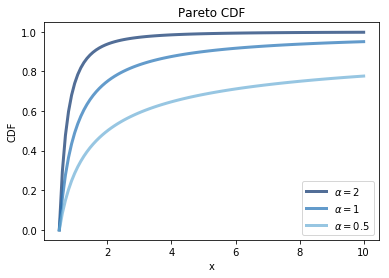

In [20]:
xmin = 0.5
thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
    thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

Distribuição normal para vários valores de parâmetros;

A distribuição de pareto é muito usada na estimação de população; 

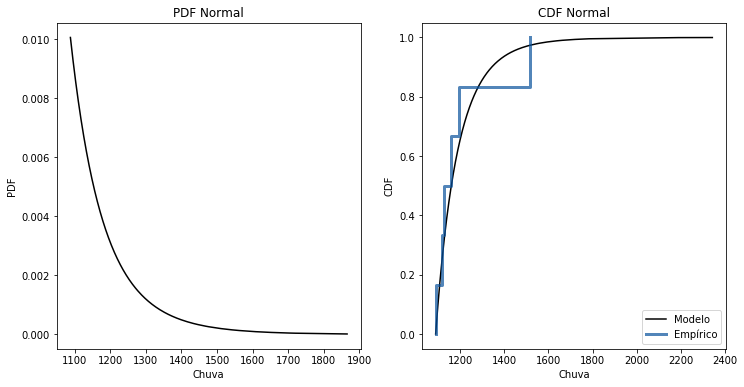

In [21]:
thinkplot.PrePlot(1, cols=2)
fun.pareto_pdf(dados_nat_max)
thinkplot.Config(title='PDF Normal', xlabel='Chuva', ylabel='PDF', legend=True)

thinkplot.SubPlot(2)
fun.pareto_cdf(dados_nat_max, label='Modelo')
cdf = thinkstats2.Cdf(dados_nat_max, label='Empírico')
thinkplot.Cdf(cdf)

thinkplot.Config(title='CDF Normal', xlabel='Chuva', ylabel='CDF', legend=True)

## Valores Aleatórias

Quando temos um CDF analítico, podemos invertê-lo para gerar valores aleatórios;

# Funções de densidade de probabilidade

# Relacionamento entre variáveis

## Gráficos de dispersão

- Opção mais simples para verificar relação entre duas variáveis;

- Consiste no lançamento dos pares de observações das variáveis que se deseja verificar a relação;

- Fornece uma impressão geral sobre o relacionamento entre variáveis;

Podemos verificar a relação entre os dados de média mensal das vazoẽs observadas e  chuva acumulada mensal;

In [22]:
dados_obs_mensal = fun.dados_media(dados_obs, freq='M')

# "COIMBRA_P": Dados de chuva
dados_chuva = fun.dados(dir_dados, label="COIMBRA_P")
dados_chuva = fun.date(dados_chuva, start="01/01/1982", end="31/12/1986")

dados_chuva_acumulada = fun.dados_acumulado(dados_chuva, freq='M')

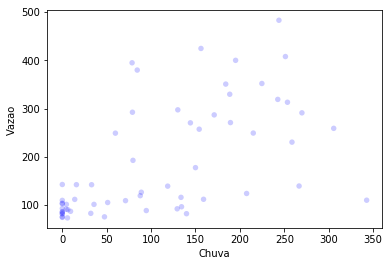

In [23]:
thinkplot.Scatter(dados_chuva_acumulada, dados_obs_mensal)
thinkplot.Config(xlabel='Chuva', ylabel='Vazao', legend=False)

- Podemos observar que existe alguma relação entre as variáveis, mas podemos notar algumas aleatoriedade entre as variáveis de chuva e vazão.

- A variável de vazão não depende somente da variável de chuva;

## Caracterizando relacionamentos
- Outras formas de visualização fornece um maior conhecimento da natureza do relacionamento; 
    
    - Uma opção é o gráfico de percentis;

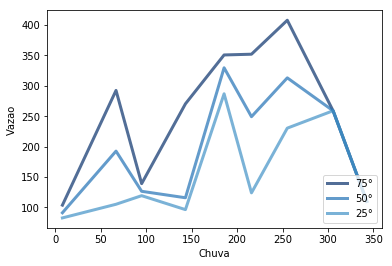

In [24]:
fun.plot_percentil(dados_chuva_acumulada, dados_obs_mensal)
thinkplot.Config(xlabel='Chuva', ylabel='Vazao', legend=True)

O gráfico de percentis, mostra que os dados de chuva e vazão observada não tem uma boa relação linear;

## Correlações
- Utilizada para **quantificar a força** de relacionamento entre duas variáveis;

- Um dos problemas para medir a relação entre duas variáveis é que muitas vezes elas não apresentam as mesmas **unidades** ou são de **distribuições diferentes**;

- As soluções para esses problemas são:
    - Transformar cada valor em um **score padrão**: que é o número desvio padrão a partir da média, "Coeficiente de correlação produto-momento de Pearson";
    - Transformar cada valor em **rank**: que é uma lista organizado pelo index de cada valor, “Coeficiente de correlação Spearman rank".
- Se X é uma série de n valores, então o score padrão(Z) é:
\begin{align}
    z_i & = \frac{x_i-\mu}{\sigma} \\
\end{align}

Onde:

    - $z_i$ é score padrão;
    - $x_i$ valor da variável;
    - $\mu$ é a média;
    - $\sigma$ é o desvio padrão.

- O Score padrão (Z) é admensional;

In [25]:
df_zscore = (dados_obs_mensal - dados_obs_mensal.mean())/dados_obs_mensal.std()
df_zscore.head(5)

1982-01-31    1.863917
1982-02-28    2.078658
1982-03-31    1.819469
1982-04-30    0.925669
1982-05-31   -0.380720
Freq: M, Name: COIMBRA_F, dtype: float64

## Covariância
- É uma medida da tendência de duas variáveis variarem juntas. 

- Se temos duas séries, X e Y, seus desvios a partir da média são:
\begin{align}
    dx_i & = x_i - \overline{x}\\
    dy_i & = y_i - \overline{y}\\
\end{align}
Onde,
    - $\overline{x}$ é a média da amostra X;
    
    - $\overline{y}$ é a média da amostra Y;

- X e Y variando juntos, os sinais dos desvios tendem a ter o mesmo sinal;

- O produto é positivo quando os desvios tiverem o mesmo sinal e negativos quando tiverem o sinal oposto.

- Covariância é a média dos produtos dos desvios;

\begin{align}
    Cov(X,Y) = \frac{1}{n} \sum dx_i dy_i
\end{align}

Onde:
    - $n$ é o tamanho das séries;

In [26]:
print("Covariância: ", dados_chuva_acumulada.cov(dados_obs_mensal))

Covariância:  6631.922295259175


## Correlação de Pearson
- Corvariância é muito utilizada, mas é difícil de interpretar;

- Um dos problemas é a difecença de unidades;

- Para resolver esse problema, divide os desvios pelos desvio padrão;
\begin{align}
P_i = \frac{(x_i - \overline{x})}{S_X}  \frac{(y_i - \overline{y})}{S_Y}
\end{align}

Onde $S_X$ e $S_Y$ são os desvios padrão de $X$ e $Y$. A média destes produtos é
\begin{align}
    \rho = \frac{1}{n} \sum \rho_i
\end{align}
Reescrever $\rho$ calculando $S_X$ e $S_Y$
Onde $S_X$ e $S_Y$ são os desvios padrão de $X$ e $Y$. A média destes produtos é
\begin{align}
    \rho = \frac{Cov(X, Y)}{S_X S_Y}
\end{align}

In [27]:
print("Correlação Pearson: ", dados_chuva_acumulada.corr(dados_obs_mensal))

Correlação Pearson:  0.5967230945229273


- É fácil de calcular e de interpretar;

- Como o score padrão é admensional, o mesmo acontece com a correlação de Pearson;

- A correlação de Pearson é sempre entre -1 e +1;

- $\rho$ é positivo a relação é **maior - maior** ou **menor - menor**;

- $\rho$ é negativa a relação é **maior - menor** ou **menor - maior**;

- $\rho$ sendo 0, nenhuma relação;

- O valor de $\rho$ indica a força de correlação, $\rho$ sendo 1 ou -1, o relacionamento entre as variáveis são perfeitas;

## Relações não lineares
- O coeficiente de correlação de Pearson mede apenas os relacionamentos lineares;

- Antes de calcular o coeficente de correlação devemos primeiro olhar o gráfico de dispersão;

## Correlação Spearman’s rank

- A correlação de Pearson não é robusto na presença de outliers;

- A correlaçção de Spearman's é uma alternativa para diminuir os efeitos de  outliers e distribuições distorcidas;

- A correlação de Spearman, é o índice na amostra classificada;

In [28]:
print("Correlação Spearman: ", dados_chuva_acumulada.corr(dados_obs_mensal, method='spearman'))

#Log
print("Correlação Pearson: ", dados_chuva_acumulada.corr(np.log(dados_obs_mensal)))

Correlação Spearman:  0.6741949186567965
Correlação Pearson:  0.6372973755735528


Causas para a correlação de Spearman ser maior que a de Pearson:

- Para relacionamento não linear, a correlação de Pearson tende a subestimar a força da relaçao;

- A correlação de Pearson é afetada por outliers;

## Correlação e causalidade

- Existe 3 posibilidades para 2 variáveis (A e B) serem correlaciondas:

    - A causa B;
    
    - B causa A;
    
    - Outro fator causa A e B;

- Como identificar a casualidade:
    
    - **Tempo**, a variável que acontece primeiro causa a outra;
    
    - **Aleatoriedade**

- Em alguns casos, é possível inferir relações causais usando **análise de regressão**;

# Estimação

![](estimação.png)

- **Estimação pontual**: Único valor numérico a um certo parâmetro populacional, a partir de estatísticas amostrais;

- **Estimação por intervalos**:  Utiliza as informações contidas na amostra.

## Propriedades dos estimadores

- **Estimadores sem viés**,  média das estimativas seja igual ao valor populacional do parâmetro;

- **Estimadores consistentes**, ;

- **Estimadores eficientes**, a variância do estimador é menor do que qualquer outro estimador;

- **Estimador suficiente**, usa toda a informação contida na amostra;

Esses fundamentos são usados para selecionar o estimador mais apropriados, uma vez que não podemos dizer que um estimador é melhor ou pior que o outro;

## Estimadores

Há uma variedade de métodos de estimação de parâmetros:

- **Método dos momentos (MOM):** 

    - Método de estimação mais simples;

    - Qualidade inferior e menos eficientes do que os estimadores de MVS, particularmente para distribuições de três ou mais parâmetros;
    
    - Para pequenas amostras são comparáveis ou até mesmo superiores aos de outros estimadores.

- **Método dos momentos-L (MML):**
    
    - Estimadores de parâmetros comparáveis, em qualidade, àqueles produzidas pelo método da MVS;
    
    - Para pequenas amostras são com alguma freqüência, mais acurados do que os de MVS.

- **Método da máxima verossimilhança (MVS):**
    
    - Considerado o método de estimação mais eficiente;
    
    - É apenas assintótica, para pequenas amostras os  estimadores são de qualidade comparável ou inferior a outros métodos;
    
    - Consistentes, suficientes e assintóticamente sem viés;


## O jogo da estimação
![](boxplot.png)

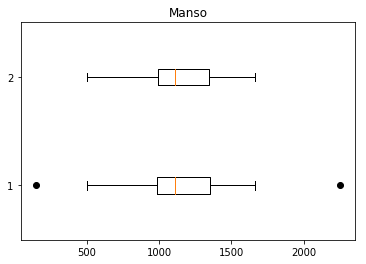

In [29]:
dados_nat = fun.dados(dir_dados, label="MANSO")
dados_nat_max = fun.annual(dados_nat, inicio)
dados_nat_max_less_out = fun.remove_outlier(dados_nat_max)

fig1, ax1 = plt.subplots()
ax1.set_title('Manso')
_ = ax1.boxplot([dados_nat_max, dados_nat_max_less_out], sym='black', vert=False)

Boxplot para os dados naturais de vazão:

- Box 1: Com outliers;

- Box 2: Sem outliers;

In [30]:
max_annual_mean = dados_nat_max.mean()
print('Média máx anual: ', max_annual_mean)

max_less_outliers_mean = dados_nat_max_less_out.mean()
print('Média máx anual sem outliers: ', max_less_outliers_mean)

Média máx anual:  1138.2357142857143
Média máx anual sem outliers:  1134.4848484848485


- $\bar{x}$ é uma escolha para estimar $\mu$;

- Este processo é chamado de estimação;

- $\bar{x}$ é uma boa alternativa para estimar $\mu$ quando a amostra não apresenta outliers;

- Alternativas quando a amostra apresenta outliers:
    
    - Uma é descartar os outliers;
    
    - Outra é usar a mediana;

- O melhor estimador depende da circunstância;
    
    - Se existe outliers;
    
    - Depende do objetivo;
    
    - Diminuir erros;

    - Chance de obter a resposta certa;

- Se não houver outliers, $\bar{x}$ minimiza o erro médio quadrático ($MSE$):

\begin{equation}
    MSE = \frac{1}{m} \sum (\bar{x} − \mu)^{2}
\end{equation}

Onde:

- $m$ é o número de iteração;

- $\bar{x}$ é a média da amostra;

- $\mu$ é a média estimada da amostra;

Performance para 2 estimadores;

Isso confirma que $\bar{x}$ minimiza o $MSE$;

Dependendo do objetivo, minimizar o $MSE$ não é a melhor estratégia:

Em alguns casos podemos usar o método de máxima verossimilhança ($MLE$) para aumentar a chance de obter a resposta certa; 

In [31]:
# A função Estimate1 usa a distribuição normal;
sigma = dados_nat_max.std()
mean = dados_nat_max.mean()

estimation.Estimate1(mu = mean, sigma = sigma, n = 25, m = 1000)

Experiment 1
rmse xbar 75.51137902627374
rmse median 95.39590794990447


## Achar a variância

$S^{2}$ é uma escolhar para estimar $\sigma^{2}$;

\begin{equation}
    S^{2} = \frac{1}{n} \sum (x_{i} - \bar{x})^{2}
\end{equation}

- $S^{2}$ é adequado para amostra grande;

- $S^{2}$ para amostra pequena, tende a ser baixo;

    - Conhecido como estimador tendencioso;

- Um estimador não é tendencioso quando o ser erro total, depois de muitas iterações, for 0;

- Existe outra estatística não tendenciosa para estimar $\sigma^{2}$;

\begin{equation}
    S_{n-1}^{2} = \frac{1}{n-1} \sum (x_{i} - \bar{x})^{2}
\end{equation}

In [32]:
# A função Estimate1 usa a distribuição normal;
estimation.Estimate2(mu = mean, sigma = sigma, n = 25, m = 1000)

Experiment 2
mean error biased -5846.516026407979
mean error unbiased -427.8174075853395


- MeanError calcula a diferença médiaa entre o valor real e o valor estimado;

- Ser tendencioso é uma propriedade do estimador;

**Método dos Momentos L** (Com outliers)

In [33]:
from genextre import Gev
gev = Gev(data=dados_nat_max)
print('Tamanho:%d\n' % len(dados_nat_max))
print('Shape: %f\nLoc: %f\nScale: %f' % gev.mml())

Tamanho:35

Shape: 0.206386
Loc: 1003.117414
Scale: 333.966759


**Método dos Momentos L** (Sem outliers)

In [34]:
gev_less = Gev(data=dados_nat_max_less_out)
print('Tamanho:%d\n' % len(dados_nat_max_less_out))
print('Shape: %f\nLoc: %f\nScale: %f' % gev_less.mml())

Tamanho:33

Shape: 0.216363
Loc: 1029.685824
Scale: 263.629523


**Método de Máxima Verossimilhança** (Com outliers)

In [35]:
print('Tamanho:%d\n' % len(dados_nat_max))
print('Shape: %f\nLoc: %f\nScale: %f' % gev.mvs())

Tamanho:35

Shape: -5.721987
Loc: 149.631896
Scale: 2.185241


**Método de Máxima Verossimilhança** (Sem outliers)

In [36]:
print('Tamanho:%d\n' % len(dados_nat_max_less_out))

print('Shape: %f\nLoc: %f\nScale: %f' % gev_less.mvs())

Tamanho:33

Shape: -5.453240
Loc: 502.046196
Scale: 0.251930


O método de maxima verossimilhança retornou 

Erro Padrão 180.2570463617103
Intervalo de Confiança:  (966.3953492781831, 1335.0618685949994)


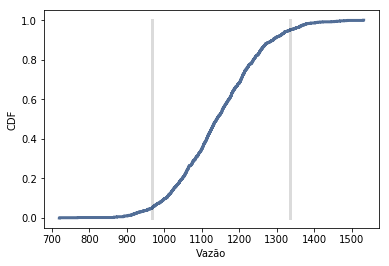

In [37]:
gev.mml()
gev.SimulateSample()
_ = thinkplot.Config(xlabel='Vazão', ylabel='CDF', legend=True)

- A distribuição é a normal;

- Distribuição amostral do estimador;

- Duas maneiras mais comuns de resumir uma distribuição amostral;
    
    - Erro padrão (SE): é a medida média que esperamos que o estimador seja;
    
    - Intervalo de confiança (CI): é o intervalo que inclue uma parte da distribuição;

- Erro padrão é frequentemente confundido com desvio padrão;

- Intervalo de confiança e erro padrão são usados para quantificar erro de amostragem;

- A distribuição amostral não leva em conta outros tipos de erros;

## Viés de amostragem

- É um proplema causado através das propriedades do processo de seleção:

- Dependendo do processo de seleção escolhido, podemos viesar a amostra;

## Distribuições exponenciais

- A média da distribuição exponencial é: $\frac{1}{\lambda}$

- $L$ é um estimador de $\lambda$
\begin{equation}
    L = \frac{1}{\bar{x}}
\end{equation}

- Se $\bar{x}$ é robusto na presença de outliers, espera-se que $L$ tenha o mesmo problema;

- Uma outra alternativa é a mediana, onde a médiana é: $\frac{ln(2)}{m}$;

\begin{equation}
    L_{m} = \frac{ln(2)}{m}
\end{equation}

Onde:

- $m$ é a mediana da amostra

In [38]:
mu = dados_nat_max.mean()
n = 30
m = 1000

estimation.Estimate3(mu, n, m)

Experiment 3
rmse L 222.57695612851367
rmse Lm 325.09358871270416
mean error L 39.519513939916564
mean error Lm 51.032118182536784


# Teste de Hipóteses

In [39]:
from genextre import Gev
gev = Gev(data=dados_nat_max)
print('Tamanho:%d\n' % len(dados_nat_max))
print('Shape: %f\nLoc: %f\nScale: %f' % gev.mml())

Tamanho:35

Shape: 0.206386
Loc: 1003.117414
Scale: 333.966759


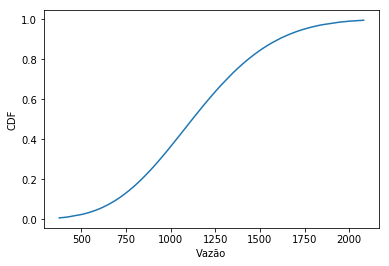

In [40]:
shape = 0.2063
loc = 1003.1174
scale = 333.966759
dist = fun.plot_gev(shape, loc, scale)
_ = thinkplot.Config(xlabel='Vazão', ylabel='CDF', legend=True)

## Teste de hipóteses classicas

A questão fundamental que queremos abordar é se os efeitos que observamos numa amostra são prováveis de aparecer na população maior.

- **Teoria da decisão:**

    - Teste de hipótese nula de Fisher;
    
    - Lema de Neyman-Pearson;
    
    - Inferência Bayesiana.

- Uma hipótese estatística é **uma afirmação sobre os parâmetros** de uma ou mais população;

- Como representamos a população por meio de distribuições, podemos fazer afirmações sobre os seus parâmetros.

- A hipótese envolve um ou mais parâmetros da distribuição;

Passos:

1. Quantificar o efeito aparante sobre a escolha do teste estatístico;

2. Definir as hipótese a ser testada:

    - **Hipótese nula**, é a hipótese que desejamos testar ($H_{0}$);

    - **Hipótese Alternativa**, é a hipótese contrária da hipótese nula ($H_{1}$);

3. Calcular o valor-p, qual a probalidade da hipótese nula ser verdadeira;

4. Interpretar o resultado. Se o valor-p é baixo, o efeito é considerado estatisticamente significante.

## Teste de hipótese
5% é o valor limite para ser estatística significante. Se o p-value é inferior a 5%, o efeito é considerado significande; caso contrário não.

- A escolha do limite do valor-p depende:
    
    - Do teste de estatística;
    
    - Do modelo de hipótese nula;        

- O valor-p não deve ser considerado como métrica de precisão.

- Valores de P entre 1% e 10% devem ser considerados limites.
    
    - Valor-p < 1%, o efeito não foi por acaso;
    
    - Valor-p > 10%, o efeito é plausivel;
    
    - 1% < Valor-p < 10%, consideramos como limite; 

Teste de hipótese para lançamentos de moeda;

In [41]:
ct = fun.CoinTest((140, 120))
pvalue = ct.PValue()
pvalue

0.212

## Testando diferença entre as médias

$H_0 = \mu$

$H_1 \neq \mu$

In [42]:
# dados resample GEV
xs_obs = dist.rvs(size=35)

data = dados_nat_max.values, xs_obs
ht_log = fun.DiffMeansPermute(data)
pvalue = ht_log.PValue()
pvalue

0.827

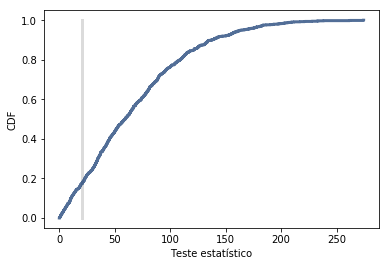

In [43]:
ht_log.PlotCdf()
thinkplot.Config(xlabel='Teste estatístico', ylabel='CDF')

pvalue > 0,10, sendo assim, concluiríamos que a diferença das média das reamostragem de vazões não é  estatisticamente significativa.

## Outras estatísticas de teste
- Escolher o melhor estatística de teste depende do questionamento.

Podemos testar diferença do desfio padrão;

$H_0 = \sigma$

$H_1 \neq \sigma$

In [44]:
ht_log_std = fun.DiffStdPermute(data)
pvalue_std = ht_log_std.PValue()
pvalue_std

0.601

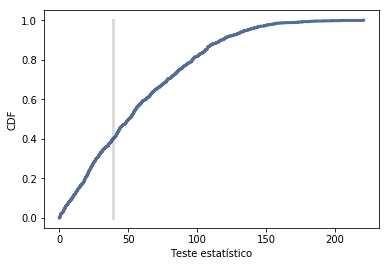

In [45]:
ht_log_std.PlotCdf()
thinkplot.Config(xlabel='Teste estatístico', ylabel='CDF')

pvalue < 0.10, sendo assim, concluiríamos que a diferença das reamostragem de vazões é  estatisticamente significativa.

## Testando uma correlação

$H_0 = \rho$

$H_1 \neq \rho$

In [46]:
data_corr_log = dados_chuva_acumulada.values, dados_obs_mensal.values
ht_corr_log = fun.CorrelationPermute(data_corr_log)
pvalue = ht_corr_log.PValue()
pvalue

0.0

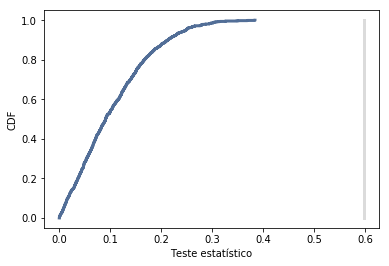

In [47]:
ht_corr_log.PlotCdf()
thinkplot.Config(xlabel='Teste estatístico', ylabel='CDF')

pvalue < 0.10, sendo assim, concluiríamos que a diferença das reamostragem de vazões é  estatisticamente significativa.

## Chi-Quadrado

In [48]:
ht_chi_test = fun.DiceChiTest(data)
pvalue = ht_chi_test.PValue()
pvalue

0.864

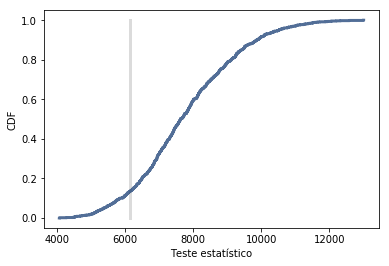

In [49]:
ht_chi_test.PlotCdf()
thinkplot.Config(xlabel='Teste estatístico', ylabel='CDF')

In [50]:
data_chi_test2 = data
ht_chi_test2 = fun.PregLengthTest(data_chi_test2)
pvalue = ht_chi_test2.PValue()
pvalue

0.502

pvalue > 0.10, sendo assim, concluiríamos que a diferença das reamostragem de vazões não é  estatisticamente significativa.

## Erros

- **Falso positivo:** Se o efeito é realmente devido ao acaso, qual é a probabilidade de ser considerado significante?
- **Falso negativo:** Se o efeito for real, qual é a chance do teste de hipótese falhar?

# Mínimos quadrados linear

## Ajuste dos mínimos quadrados
- Os coeficientes de correlação medem a força e o sinal de uma relação, mas não a inclinação;

- A forma mais comum para estimar a inclinação é o ajuste de mínimos quadrados;

- **Ajuste linear** é uma linha destinada a modelar a relação entre variáveis;

- O ajuste de **mínimos quadrados** minimiza o erro quadrático médio (MSE) entre a linha e os dados;

- ys é expressar em função de outra sequência xs, onde:

\begin{equation}
    ys[i] = inter + slope * xs[i] + \epsilon
\end{equation}

- $\epsilon$ É um erro aleatório de média 0 e variância $\sigma^{2}$

- Sendo assim, o valor esperado de ys pertence a uma distribuição normal com parâmetros 

$\mu$, sendo:

\begin{equation}
    \mu_{ys|x} = inter + slope * xs[i]
\end{equation}

- Esta previsão é apenas aproximada, o desvio residual é,

\begin{equation}
    res = ys - (inter + slope * xs)
\end{equation}

- Os **resíduos** são devidos a **fatores aleatórios** como erro de medição ou **fatores não aleatórios** que são desconhecidos;

- O objetivo dos parâmetros inter e slope, é diminuir o resíduo, isso pode ser feito de várias formas:
    
    - Minimizar o valor absoluto;
    
    - Seus quadrados;
    
    - Seus cubos;
    
    - **Minimizar a soma dos resíduos ao quadrado**.

- Logo abaixo está listado as razões para minimizar a soma dos resíduos ao quadrado:
    
    - Trata os resíduos positivos e negativos da mesma forma;
    
    - Dá mais peso aos grandes resíduos;
    
    - É um estimador de máxima verosimilhança de inter e slope;
    
    - Os valores de inter e slope podem ser calculados de forma eficiente.

## Implementação

Calculadno a precipitação acumulada mensal e vazões médias mensal, e depois identificar identificar a relação entre as duas variáveis.

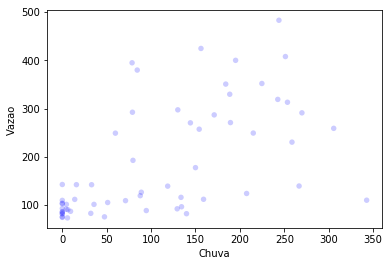

In [51]:
dados_chuva = fun.date(dados_chuva, start="01/01/1982", end="31/12/1986")

dados_obs_mensal = fun.dados_media(dados_obs, freq='M')
dados_chuva_acumulada = fun.dados_acumulado(dados_chuva, freq='M')

thinkplot.Scatter(dados_chuva_acumulada, dados_obs_mensal)
thinkplot.Config(xlabel='Chuva', ylabel='Vazao', legend=False)

In [52]:
# 
inter, slope = thinkstats2.LeastSquares(dados_chuva_acumulada, dados_obs_mensal)
print("Inter: ", round(inter, 4), "\nSlope: ", round(slope, 4))

Inter:  109.2364 
Slope:  0.7056


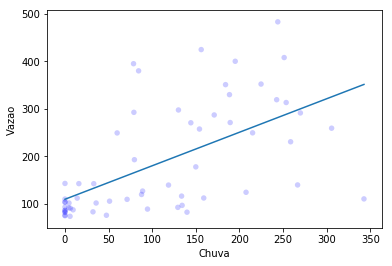

In [53]:
fit_xs, fit_ys = thinkstats2.FitLine(dados_chuva_acumulada, inter, slope)
_ = plt.plot(fit_xs, fit_ys)

thinkplot.Scatter(dados_chuva_acumulada, dados_obs_mensal)
thinkplot.Config(xlabel='Chuva', ylabel='Vazao', legend=False)

## Estimação

- Os parâmetros inter e slope são estimativas baseadas em uma amostra; como isso são vulneráveis a:

    - Viés de amostragem: causado por amostragem não representativa;
    
    - Erro de medição: o erro de medição é causado por erros na coleta e registro de dados;
    
    - Erro de amostragem: resultado da medição de uma amostra em vez de toda a população.

In [54]:
inters, slopes = fun.SamplingDistributions(dados_chuva_acumulada, dados_obs_mensal, iters=1001)

In [55]:
fun.Summarize(inters)

mean:  108.78942867390236 
SE:  13.434860629581014 
CI:  (88.11511535803655, 131.35153105050438)


In [56]:
fun.Summarize(slopes)

mean:  0.7089882229406816 
SE:  0.14130876209027726 
CI:  (0.4735983237165256, 0.9460299979581841)


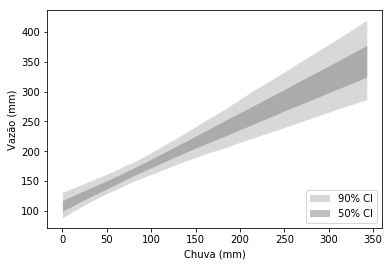

In [57]:
fun.PlotConfidenceIntervals(dados_chuva_acumulada, inters, slopes, percent=90, 
                        color='gray', alpha=0.3, label='90% CI')
fun.PlotConfidenceIntervals(dados_chuva_acumulada, inters, slopes, percent=50,
                        color='gray', alpha=0.5, label='50% CI')

thinkplot.Config(xlabel="Chuva (mm)", ylabel='Vazão (mm)', legend=True)

## Bondade de ajuste

- **Desvio padrão dos resíduos** é a maneira mais simples de medir a bondade do ajuste;

- Outra forma de medir a bondade de ajuste é o **coeficiente de determinação**;

- O coeficiente compara a variância dos resíduos com a variância da variável dependente;

In [58]:
res = thinkstats2.Residuals(dados_chuva_acumulada, dados_obs_mensal, inter, slope)
r2 = thinkstats2.CoefDetermination(dados_chuva_acumulada, res)
r2

0.09974583930494507

- Os dados de chuva responde por cerca de 38% dos dados de vazão;

- Existe uma **relação simples** entre o **coeficiente de determinação** e o **coeficiente de correlação de Pearson**:

    - O valor de $R^{2} \approx \rho^{2}$

In [59]:
print('\rho', thinkstats2.Corr(dados_chuva_acumulada, dados_obs_mensal))
print('R', np.sqrt(r2))  

ho 0.5967230945229274
R 0.31582564700312904


## Testando um modelo linear

Uma opção é testar se a aparente redução da MSE se deve ao acaso. 

- Estatística do teste é $R^{2}$ e a hipótese nula é que não há relação entre as variáveis;

- Um teste unilateral de $R_{2}$ é equivalente a um teste bilateral de $\rho$;

- Outra abordagem é testar se a inclinação aparente se deve ao acaso.

In [60]:
ht = fun.SlopeTest((dados_chuva_acumulada, dados_obs_mensal))
pvalue = ht.PValue()
pvalue

0.0

- A **estatística do teste** é a **inclinação** estimada pelo LeastSquares

- Podemos também utilizar a reamostragem para estimar a distribuição amostral da inclinação.

In [61]:
reamostragem_cdf = thinkstats2.Cdf(slopes)

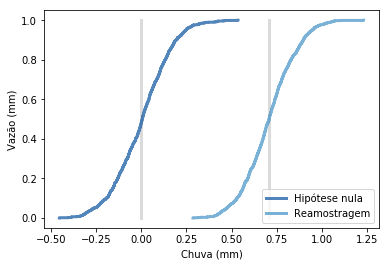

In [62]:
thinkplot.PrePlot(2)
thinkplot.Plot([0, 0], [0, 1], color='0.8')
ht.PlotCdf(label='Hipótese nula')

thinkplot.Cdf(reamostragem_cdf, label='Reamostragem')

thinkplot.Config(xlabel="Chuva (mm)", ylabel='Vazão (mm)', legend=True)

Podemos calcular o valor-p de duas maneiras:

- Calcular a probabilidade de a inclinação sob a hipótese nula exceder a inclinação observada;

- Calcular a probabilidade de que a inclinação na distribuição amostral caia abaixo de 0. (Se a inclinação estimada fosse negativa, calcularíamos a probabilidade de que a inclinação na distribuição amostral excedesse 0.)

In [63]:
inters, slopes = fun.SamplingDistributions(dados_chuva_acumulada, dados_obs_mensal, iters=1000)
slope_cdf = thinkstats2.Cdf(slopes)
pvalue = slope_cdf[0]
pvalue

0